# Testing Histograms for Image Similarity 

Using python and OpenCV this project will be testing color distribution histograms as a method of testing image similarity. 

In [1]:
import cv2
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Test Data: 

Initially I chose two main images that were different. Both are pictures of the same subject matter but are different. 

* I cropped two smaller images that would be similar but not exact copies of eachother. 
* The other image I left alone. 

#### Loading in the images. 

In [2]:
path1 = ".\\images\\im1.jpg"
path2 = ".\\images\\im2.jpg"
path3 = ".\\images\\im3.jpg"

#open the images in color and grayscale.
im1 = cv2.imread(path1)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im1Gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
height1, width1 = im1.shape[:2]
n1 = height1 * width1     #the number of pixels in image 1.

im2 = cv2.imread(path2)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im2Gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)
height2, width2 = im2.shape[:2]
n2 = height2 * width2     #the number of pixels in image2.

im3 = cv2.imread(path3)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im3Gray = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)
height3, width3 = im3.shape[:2]
n3 = height3 * width3     #the number of pixels in image 3.

#### Resize the images: 

In [3]:
#resize the images
minHeight = min(height1, height2)
minHeight = min(minHeight, height3)
minWidth = min(width1, width2)
minWidth = min(minWidth, width3)

# im1 = cv2.resize(im1, (minWidth, minHeight))
im1Gray = cv2.resize(im1Gray, (minWidth, minHeight))
# im2 = cv2.resize(im2, (minWidth, minHeight))
im2Gray = cv2.resize(im2Gray, (minWidth, minHeight))
# im3 = cv2.resize(im3, (minWidth, minHeight))
im3Gray = cv2.resize(im3Gray, (minWidth, minHeight))

#### Function to get histograms: 

In [5]:
#--------Function---------
def getHist(image, type):
    histograms = []
    color = ("b", "g", "r")
    if (type == 0): #the image is greyscale.
        h = cv2.calcHist([image], [0], None, [256], [0,256])
        histograms.append(h)
    else: #the image is color:
        for i , col in enumerate(color):
            h = cv2.calcHist([image],[i],None, [256], [0,256])
            histograms.append(h)
    return histograms
#--------------------------

# getting the color and greyscale histograms. 
#get the color histograms:
# im1CHist = getHist(im1, 1)
im1GHist = getHist(im1Gray,0)
dist1 = np.array(im1GHist).flatten()

# im2CHist = getHist(im2, 1)
im2GHist = getHist(im2Gray, 0)
dist2 = np.array(im2GHist).flatten()

# im3CHist = getHist(im3, 1)
im3GHist = getHist(im3Gray, 0)
dist3 = np.array(im3GHist).flatten()

## KS Testing: 

* Null hypothesis: The images are similar
* Alternate hypothesis: The images are not similar
* Alpha = 0.05 

In [7]:
#KS test for images 1 and two which we know are similar.
#ho = im1 and im2 are similar.
#h alternative = im1 and im2 are not similar
ksTest1 = stats.ks_2samp(dist1, dist2)
ksTest2 = stats.ks_2samp(dist1, dist3)

#### Testing images that are known to be similar: 

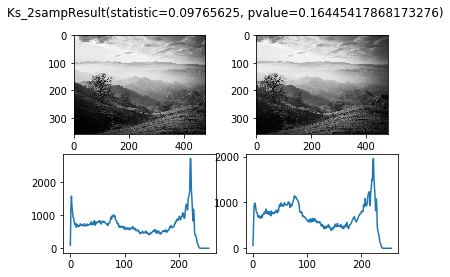

In [8]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(im1Gray, cmap= "gray")
axarr[0,1].imshow(im2Gray, cmap= "gray")
axarr[1,0].plot(im1GHist[0])
axarr[1,1].plot(im2GHist[0])
f.suptitle(str(ksTest1))
plt.show()

#### Testing images that are known to be different: 


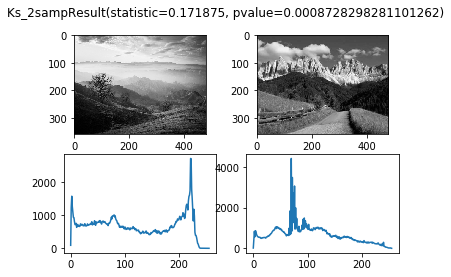

In [9]:

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(im1Gray, cmap= "gray")
axarr[0,1].imshow(im3Gray, cmap= "gray")
axarr[1,0].plot(im1GHist[0])
axarr[1,1].plot(im3GHist[0])
f.suptitle(str(ksTest2))

plt.show()

## I will be exploring KS Testing using color channel histograms. 